In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


## Load data

In [ ]:
# Loading MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

(fx_train, fy_train), (fx_test, fy_test) = tf.keras.datasets.fashion_mnist.load_data()

print("Dim x_train:", x_train.shape)
print("Dim y_train:", y_train.shape)
print("Dim x_test:", x_test.shape)
print("Dim y_test:", y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Dim x_train: (60000, 28, 28)
Dim y_train: (60000,)
Dim x_test: (10000, 28, 28)
Dim y_test: (10000,)


In [ ]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
x_train_n = x_train / 255 # normalization
x_test_n = x_test / 255
x_train_n[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
fx_test_n = fx_test / 255

## Convolutional AE

In [ ]:
def conv_ae(dim_inputs, encoder_units, bottleneck_units, decoder_units):
  inputs =  tf.keras.layers.Input(shape=(dim_inputs))

  # encoder
  conv_1e = tf.keras.layers.Conv2D(filters=encoder_units[0], kernel_size=(3,3), activation='relu', padding='same', name='enc_0')(inputs)
  max_p_1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), name='enc_0_maxp')(conv_1e)

  conv_2e = tf.keras.layers.Conv2D(filters=encoder_units[1], kernel_size=(3,3), activation='relu', padding='same', name='enc_1')(max_p_1)
  max_p_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), name='enc_1_maxp')(conv_2e)

  # bottleneck
  bottleneck = tf.keras.layers.Conv2D(filters=bottleneck_units, kernel_size=(3,3), activation='relu', padding='same', name='bottleneck')(max_p_2)

  # decoder
  conv_1d = tf.keras.layers.Conv2D(filters=decoder_units[0], kernel_size=(3,3), activation='relu', padding='same', name='dec_0')(bottleneck)
  up_sm_1 = tf.keras.layers.UpSampling2D(size=(2,2))(conv_1d)

  conv_2d = tf.keras.layers.Conv2D(filters=decoder_units[1], kernel_size=(3,3), activation='relu', padding='same', name='dec_1')(up_sm_1)
  up_sm_2 = tf.keras.layers.UpSampling2D(size=(2,2))(conv_2d)

  conv_3d = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same', name='output')(up_sm_2)

  model = tf.keras.Model(inputs=inputs, outputs=conv_3d)
  return model

In [ ]:
# (64,128, 256) -> (128,64,784)
cae_128 = conv_ae((x_train.shape[1],x_train.shape[2],1), [64,128], 256, [128,64])
 # binary to check the values of each pixel, which are between 0-1 due to normalization, that's why we use sigmoid activation and binary_crossentropy loss (as segmentation networks)
cae_128.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# (32,64,128) -> (64,32,784)
cae_64 = conv_ae((x_train.shape[1],x_train.shape[2],1), [32,64], 128, [64,32])
cae_64.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

## Train of the models

In [ ]:
cae_128.fit(x_train_n, x_train_n, epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 22s 29ms/step - loss: 0.1132 - accuracy: 0.8094
Epoch 2/30
235/235 [==============================] - 7s 29ms/step - loss: 0.0721 - accuracy: 0.8152
Epoch 3/30
235/235 [==============================] - 7s 28ms/step - loss: 0.0690 - accuracy: 0.8154
Epoch 4/30
235/235 [==============================] - 7s 31ms/step - loss: 0.0675 - accuracy: 0.8154
Epoch 5/30
235/235 [==============================] - 7s 28ms/step - loss: 0.0666 - accuracy: 0.8154
Epoch 6/30
235/235 [==============================] - 7s 31ms/step - loss: 0.0659 - accuracy: 0.8155
Epoch 7/30
235/235 [==============================] - 7s 28ms/step - loss: 0.0654 - accuracy: 0.8155
Epoch 8/30
235/235 [==============================] - 7s 29ms/step - loss: 0.0650 - accuracy: 0.8155
Epoch 9/30
235/235 [==============================] - 7s 28ms/step - loss: 0.0646 - accuracy: 0.8155
Epoch 10/30
235/235 [==============================] - 7s 30ms/step - loss: 0.0643 - accur

In [ ]:
cae_64.fit(x_train_n, x_train_n, epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 6s 15ms/step - loss: 0.1415 - accuracy: 0.8068
Epoch 2/30
235/235 [==============================] - 4s 15ms/step - loss: 0.0759 - accuracy: 0.8150
Epoch 3/30
235/235 [==============================] - 4s 16ms/step - loss: 0.0722 - accuracy: 0.8152
Epoch 4/30
235/235 [==============================] - 3s 14ms/step - loss: 0.0702 - accuracy: 0.8153
Epoch 5/30
235/235 [==============================] - 3s 14ms/step - loss: 0.0690 - accuracy: 0.8154
Epoch 6/30
235/235 [==============================] - 4s 16ms/step - loss: 0.0683 - accuracy: 0.8154
Epoch 7/30
235/235 [==============================] - 3s 15ms/step - loss: 0.0676 - accuracy: 0.8154
Epoch 8/30
235/235 [==============================] - 4s 16ms/step - loss: 0.0672 - accuracy: 0.8154
Epoch 9/30
235/235 [==============================] - 3s 14ms/step - loss: 0.0667 - accuracy: 0.8154
Epoch 10/30
235/235 [==============================] - 4s 16ms/step - loss: 0.0665 - accura

In [ ]:
cae_128.save('cae_128.h5')
cae_64.save('cae_64.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Models test

In [ ]:
cm_128 = tf.keras.models.load_model('cae_128.h5')
cm_64 = tf.keras.models.load_model('cae_64.h5')

In [ ]:
sample_index = np.array(([8730, 3281, 2994, 1599, 5450]))
sample_index

array([8730, 3281, 2994, 1599, 5450])

In [ ]:
def inference(model, sample_index, x_set):

  fig, axs = plt.subplots(2, len(sample_index), figsize=(12,6))

  for i,index in enumerate(sample_index):
    pred = model.predict(tf.expand_dims(x_set[index],axis=0), verbose=0)
    pred = tf.reshape(pred, (28,28))
    axs[0,i].imshow(tf.reshape(x_set[index], (28,28)),cmap='gray')
    #axs[0,i].axis('off')
    axs[1,i].imshow(pred, cmap='gray')
    #axs[1,i].axis('off')

  ax_top = fig.add_subplot(2, 1, 1)
  ax_top.axis('off')
  ax_top.set_title("Original images")

  ax_top = fig.add_subplot(2, 1, 2)
  ax_top.axis('off')
  ax_top.set_title("Predictions")


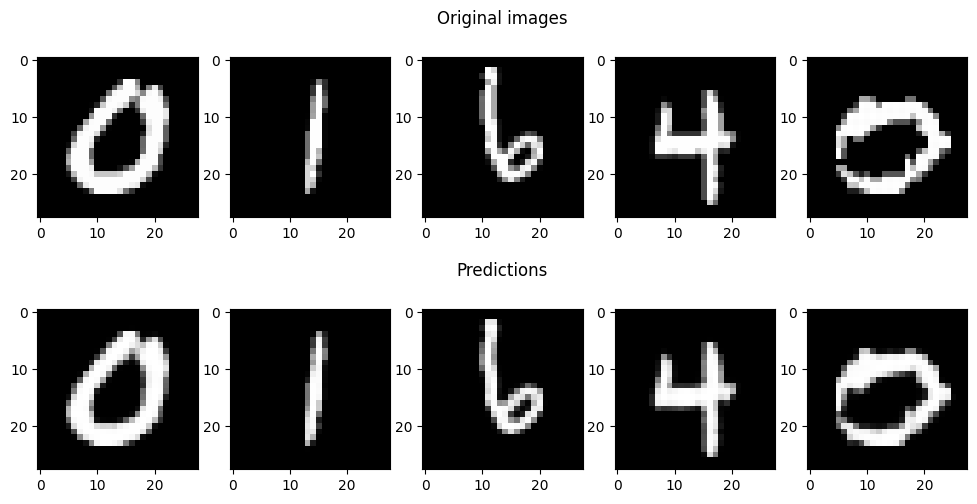

In [ ]:
inference(cm_128, sample_index, x_test_n)

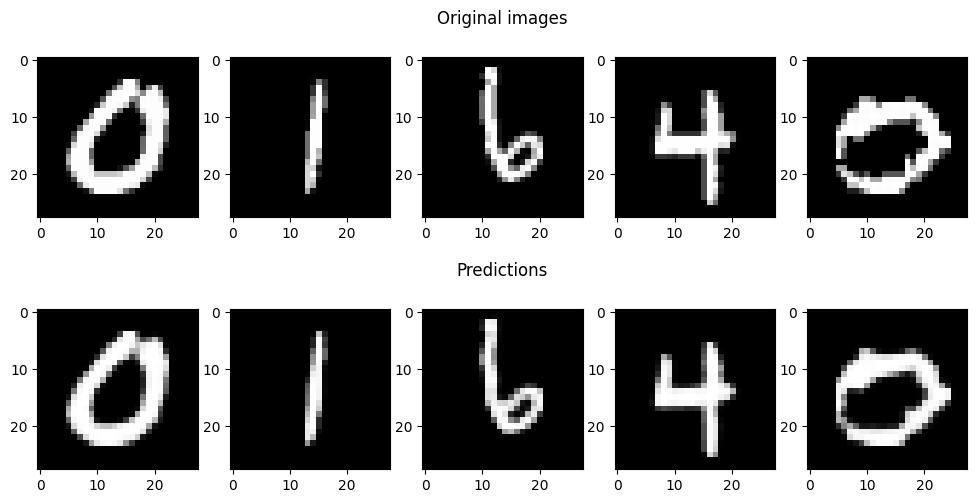

In [ ]:
inference(cm_64, sample_index, x_test_n)

## Reconstruction error example

---



In [ ]:
def inference_RE(model, sample_index, x_set):

  fig, axs = plt.subplots(2, len(sample_index), figsize=(12,6))

  for i,index in enumerate(sample_index):
    pred = model.predict(tf.expand_dims(x_set[index],axis=0), verbose=0)
    pred = tf.reshape(pred, (28,28))

    re = tf.reduce_mean(tf.square(x_set[index] - pred))
    re = re.numpy()
    re = np.array2string(re, separator='')

    axs[0,i].imshow(tf.reshape(x_set[index], (28,28)),cmap='gray')
    #axs[0,i].axis('off')
    axs[1,i].imshow(pred, cmap='gray')
    #axs[1,i].axis('off')
    axs[1,i].set_title('RE: ' + re)

  ax_top = fig.add_subplot(2, 1, 1)
  ax_top.axis('off')
  ax_top.set_title("Original images")

  ax_top = fig.add_subplot(2, 1, 2)
  ax_top.axis('off')
  ax_top.set_title("Predictions")

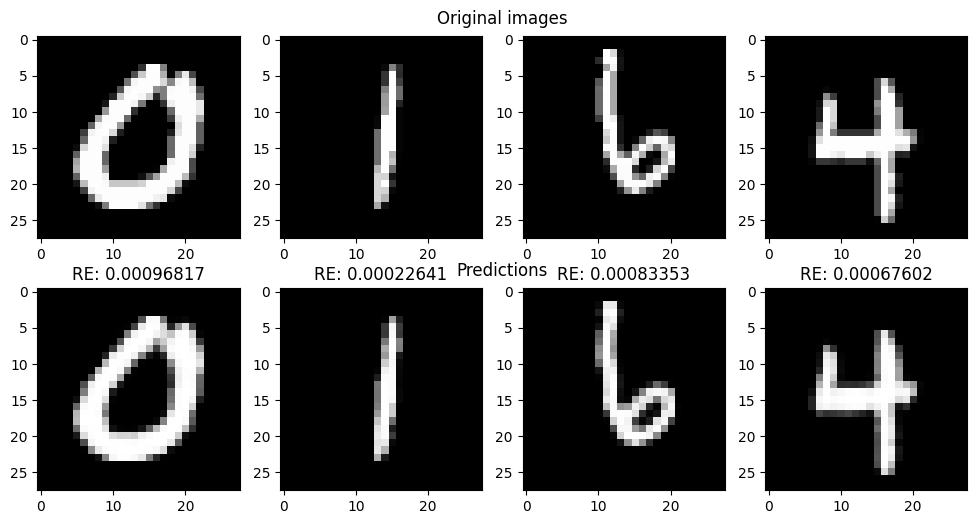

In [ ]:
inference_RE(cm_128, sample_index[:-1], x_test_n)

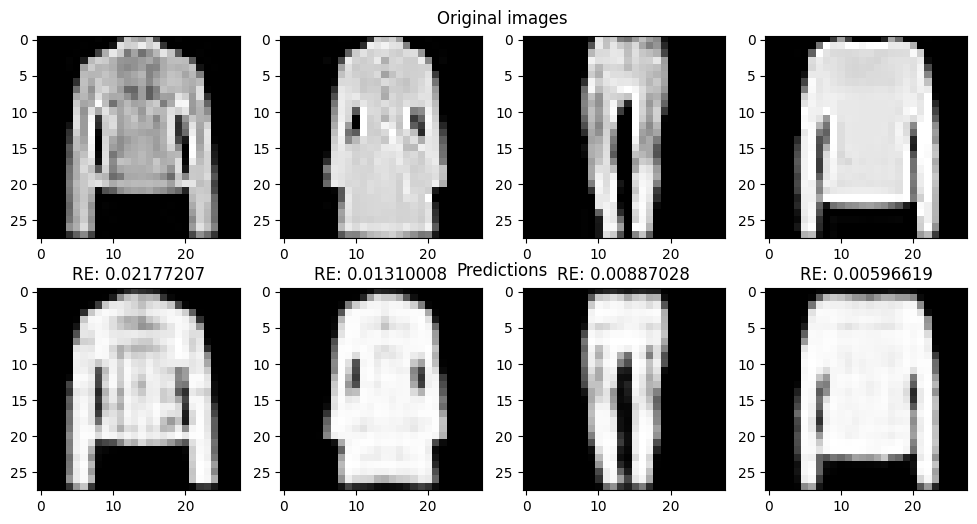

In [ ]:
inference_RE(cm_128, sample_index[:-1], fx_test_n)

## Latent spaces

In [ ]:
cm_128.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 enc_0 (Conv2D)              (None, 28, 28, 64)        640       
                                                                 
 enc_0_maxp (MaxPooling2D)   (None, 14, 14, 64)        0         
                                                                 
 enc_1 (Conv2D)              (None, 14, 14, 128)       73856     
                                                                 
 enc_1_maxp (MaxPooling2D)   (None, 7, 7, 128)         0         
                                                                 
 bottleneck (Conv2D)         (None, 7, 7, 256)         295168    
                                                                 
 dec_0 (Conv2D)              (None, 7, 7, 128)         2950

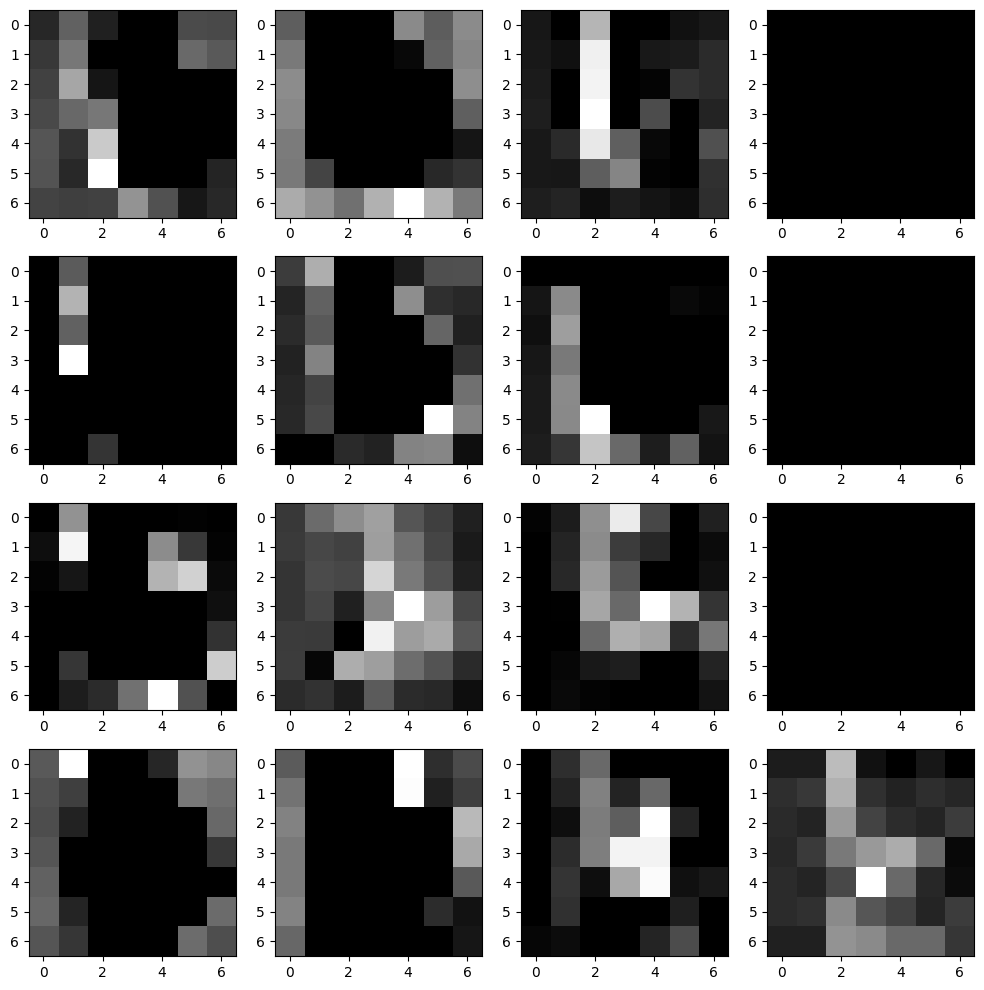

In [ ]:
bottleneck_layer = cm_128.get_layer('bottleneck')

latent_model = tf.keras.models.Model(inputs=cm_128.input, outputs=bottleneck_layer.output)

lat = latent_model.predict(tf.expand_dims(x_test_n[2994],axis=0), verbose=0)

# Mostrar las 256 imágenes separadas
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(lat[0][:, :, i * 4 + j], cmap='gray')

plt.tight_layout()
plt.show()

#Exercise

Instead of training with MNIST and evaluating the RE on examples from MNIST and FASHION, train with the FASHION database and evaluate the RE on the same previous examples.


## Load Data (Fashion)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train_n = x_train / 255 # normalization
x_test_n = x_test / 255

In [ ]:
# (64,128, 256) -> (128,64,784)
cae_128 = conv_ae((x_train.shape[1],x_train.shape[2],1), [64,128], 256, [128,64])
 # binary to check the values of each pixel, which are between 0-1 due to normalization, that's why we use sigmoid activation and binary_crossentropy loss (as segmentation networks)
cae_128.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# (32,64,128) -> (64,32,784)
cae_64 = conv_ae((x_train.shape[1],x_train.shape[2],1), [32,64], 128, [64,32])
cae_64.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

TRAIN THE MODEL


In [ ]:
cae_128.fit(x_train_n, x_train_n, epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 16s 30ms/step - loss: 0.3067 - accuracy: 0.5035
Epoch 2/30
235/235 [==============================] - 6s 27ms/step - loss: 0.2681 - accuracy: 0.5090
Epoch 3/30
235/235 [==============================] - 6s 27ms/step - loss: 0.2624 - accuracy: 0.5095
Epoch 4/30
235/235 [==============================] - 6s 27ms/step - loss: 0.2585 - accuracy: 0.5097
Epoch 5/30
235/235 [==============================] - 7s 28ms/step - loss: 0.2561 - accuracy: 0.5098
Epoch 6/30
235/235 [==============================] - 7s 28ms/step - loss: 0.2544 - accuracy: 0.5099
Epoch 7/30
235/235 [==============================] - 6s 27ms/step - loss: 0.2530 - accuracy: 0.5100
Epoch 8/30
235/235 [==============================] - 7s 30ms/step - loss: 0.2520 - accuracy: 0.5100
Epoch 9/30
235/235 [==============================] - 6s 27ms/step - loss: 0.2515 - accuracy: 0.5100
Epoch 10/30
235/235 [==============================] - 7s 28ms/step - loss: 0.2507 - accur

In [ ]:
cae_64.fit(x_train_n, x_train_n, epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 8s 20ms/step - loss: 0.3092 - accuracy: 0.5042
Epoch 2/30
235/235 [==============================] - 4s 15ms/step - loss: 0.2721 - accuracy: 0.5088
Epoch 3/30
235/235 [==============================] - 3s 14ms/step - loss: 0.2666 - accuracy: 0.5092
Epoch 4/30
235/235 [==============================] - 3s 14ms/step - loss: 0.2632 - accuracy: 0.5095
Epoch 5/30
235/235 [==============================] - 3s 14ms/step - loss: 0.2607 - accuracy: 0.5096
Epoch 6/30
235/235 [==============================] - 3s 15ms/step - loss: 0.2589 - accuracy: 0.5097
Epoch 7/30
235/235 [==============================] - 3s 14ms/step - loss: 0.2575 - accuracy: 0.5098
Epoch 8/30
235/235 [==============================] - 3s 14ms/step - loss: 0.2565 - accuracy: 0.5098
Epoch 9/30
235/235 [==============================] - 3s 14ms/step - loss: 0.2555 - accuracy: 0.5099
Epoch 10/30
235/235 [==============================] - 5s 22ms/step - loss: 0.2547 - accura

MODEL TEST

In [ ]:
cm_128 = cae_128
cm_64 = cae_64

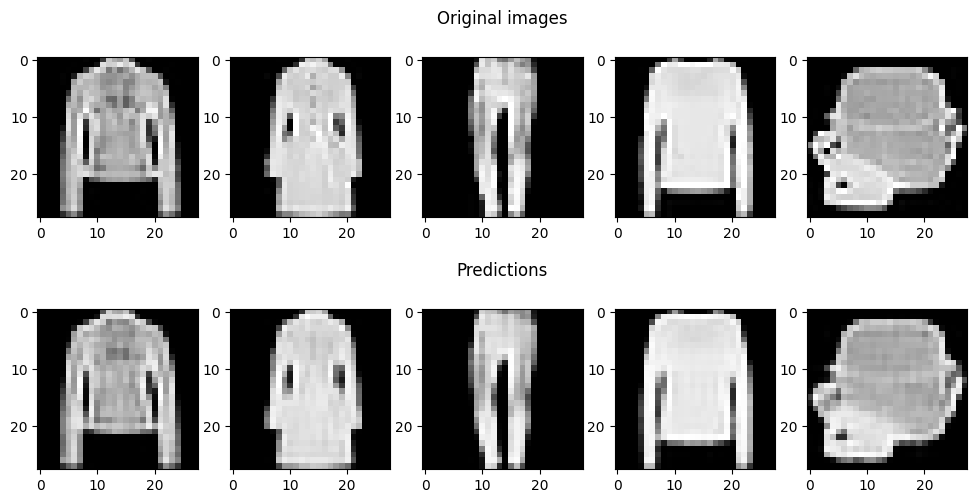

In [ ]:
inference(cm_128, sample_index, x_test_n)

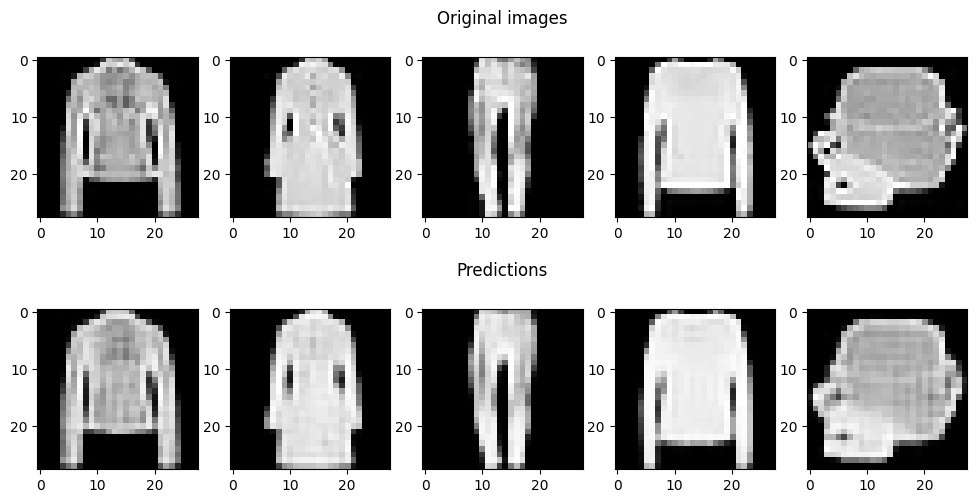

In [ ]:
inference(cm_64, sample_index, x_test_n)

## Reconstruction error example

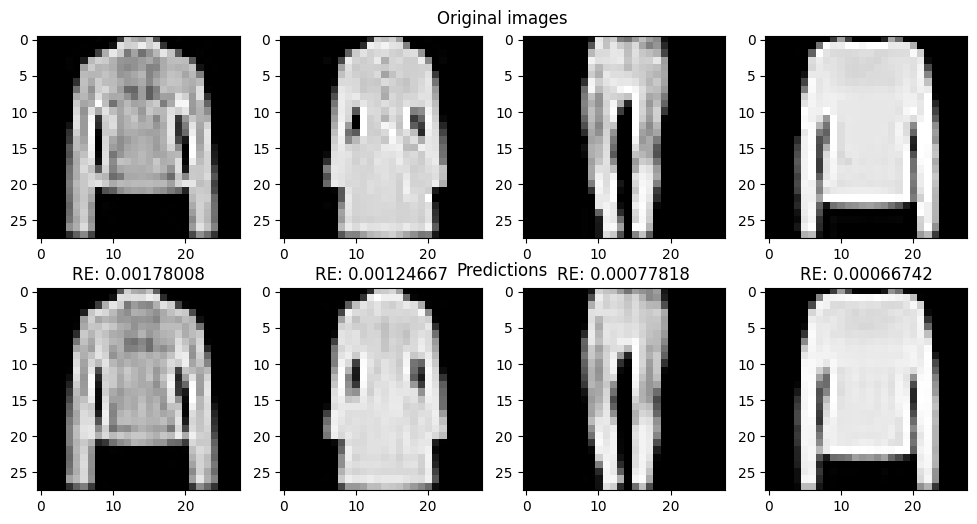

In [ ]:
inference_RE(cm_128, sample_index[:-1], x_test_n)

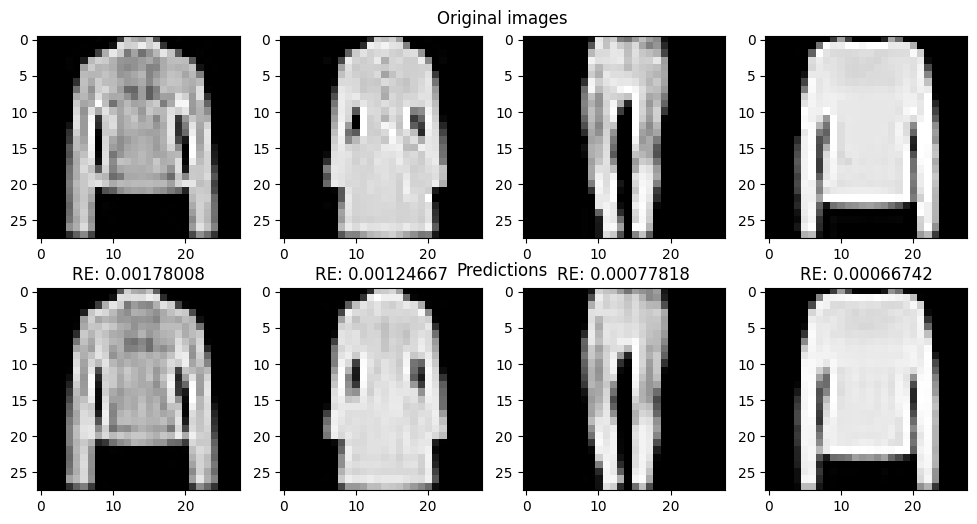

In [ ]:
inference_RE(cm_128, sample_index[:-1], fx_test_n)

## Latent spaces

In [ ]:
cm_128.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 enc_0 (Conv2D)              (None, 28, 28, 64)        640       
                                                                 
 enc_0_maxp (MaxPooling2D)   (None, 14, 14, 64)        0         
                                                                 
 enc_1 (Conv2D)              (None, 14, 14, 128)       73856     
                                                                 
 enc_1_maxp (MaxPooling2D)   (None, 7, 7, 128)         0         
                                                                 
 bottleneck (Conv2D)         (None, 7, 7, 256)         295168    
                                                                 
 dec_0 (Conv2D)              (None, 7, 7, 128)         2950

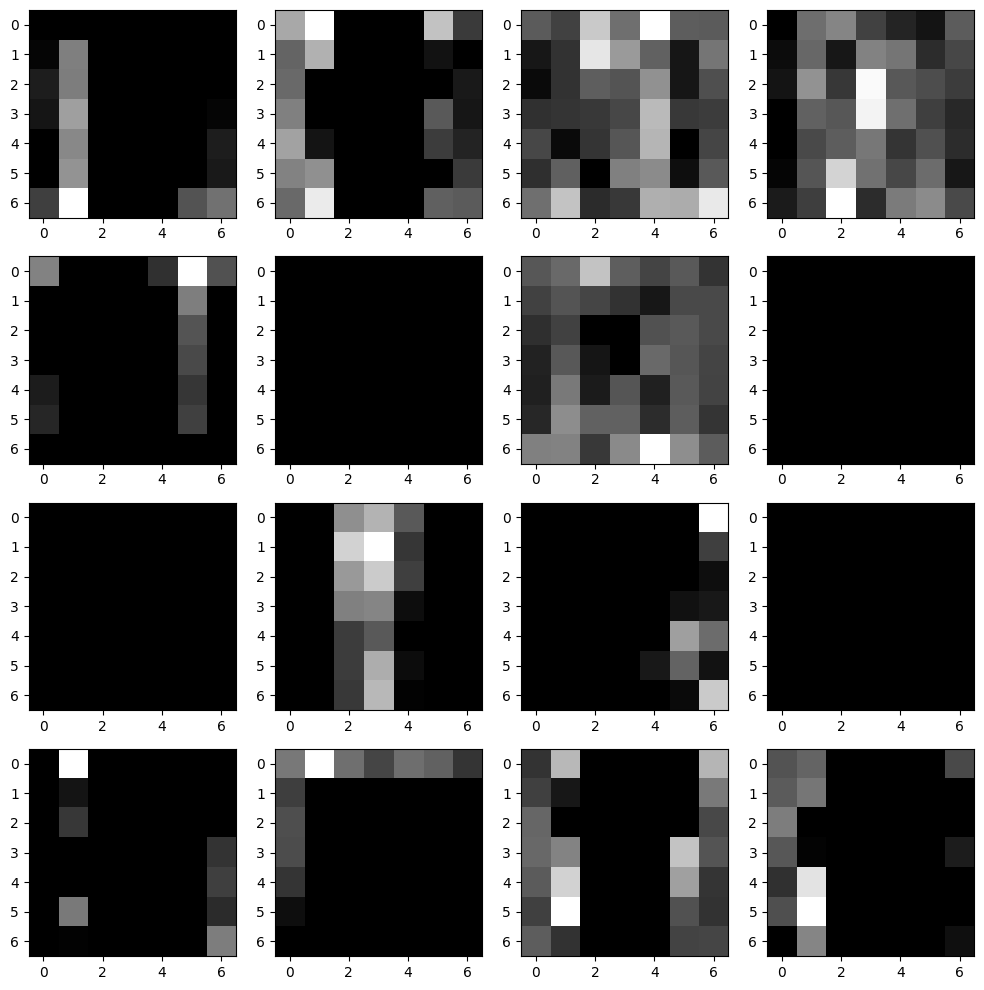

In [ ]:
bottleneck_layer = cm_128.get_layer('bottleneck')

latent_model = tf.keras.models.Model(inputs=cm_128.input, outputs=bottleneck_layer.output)

lat = latent_model.predict(tf.expand_dims(x_test_n[2994],axis=0), verbose=0)

# Mostrar las 256 imágenes separadas
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(lat[0][:, :, i * 4 + j], cmap='gray')

plt.tight_layout()
plt.show()